In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ul2s2kcd because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv('olist_processado.csv')

In [3]:
df.head()

,customer_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_item_id,product_id,price,review_id,review_score,customer_lat,customer_long,product_category_name,quantidade_item
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,88b8b52d46df026a9d1ad2136a59b30b,4,-20.500253,-47.400367,moveis_escritorio,1
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,7fc63200f12eebb5f387856afdd63db8,1,-2.441535,-54.720801,moveis_escritorio,2
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,7fc63200f12eebb5f387856afdd63db8,1,-2.441535,-54.720801,moveis_escritorio,2
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,251191809e37c1cffc16865947c18a4d,3,-29.879675,-51.272093,moveis_escritorio,1
4,6bc8d08963a135220ed6c6d098831f84,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,f7123bac5b91a0e2e38d8b41fd1206f4,4,-22.610299,-43.176850,moveis_escritorio,1


In [4]:
df['product_category_name'] = df['product_category_name'].apply(lambda x: x.split('_'))
df.head()

,customer_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_item_id,product_id,price,review_id,review_score,customer_lat,customer_long,product_category_name,quantidade_item
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,88b8b52d46df026a9d1ad2136a59b30b,4,-20.500253,-47.400367,"[moveis, escritorio]",1
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,7fc63200f12eebb5f387856afdd63db8,1,-2.441535,-54.720801,"[moveis, escritorio]",2
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,7fc63200f12eebb5f387856afdd63db8,1,-2.441535,-54.720801,"[moveis, escritorio]",2
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,251191809e37c1cffc16865947c18a4d,3,-29.879675,-51.272093,"[moveis, escritorio]",1
4,6bc8d08963a135220ed6c6d098831f84,mage,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,f7123bac5b91a0e2e38d8b41fd1206f4,4,-22.610299,-43.176850,"[moveis, escritorio]",1


In [5]:
from collections import Counter

categoria_counts = Counter(c for categorias in df['product_category_name'] for c in categorias)
print(f"Há {len(categoria_counts)} rótulos de categoria.")
categoria_counts

Há 109 rótulos de categoria.


Counter({'moveis': 11375,
         'escritorio': 1726,
         'utilidades': 7131,
         'domesticas': 7131,
         'casa': 1251,
         'conforto': 531,
         'esporte': 8818,
         'lazer': 8785,
         'informatica': 7960,
         'acessorios': 11141,
         'brinquedos': 4182,
         'decoracao': 8680,
         'artes': 243,
         'cama': 11534,
         'mesa': 11534,
         'banho': 11534,
         'automotivo': 4303,
         'climatizacao': 299,
         'telefonia': 4850,
         'beleza': 9810,
         'saude': 9810,
         'ferramentas': 6399,
         'jardim': 5001,
         'pet': 1969,
         'shop': 1969,
         'alimentos': 821,
         'bebes': 3189,
         'construcao': 3431,
         'relogios': 6046,
         'presentes': 6046,
         'cool': 3888,
         'stuff': 3888,
         'sala': 528,
         'cozinha': 305,
         'area': 290,
         'de': 503,
         'servico': 290,
         'jantar': 290,
         'e': 3338,

In [6]:
print("As 5 categorias mais comuns: \n"), categoria_counts.most_common(5)

As 5 categorias mais comuns: 



(None,
 [('cama', 11534),
  ('mesa', 11534),
  ('banho', 11534),
  ('moveis', 11375),
  ('acessorios', 11141)])

In [7]:
categoria_count_df = pd.DataFrame([categoria_counts]).T.reset_index()

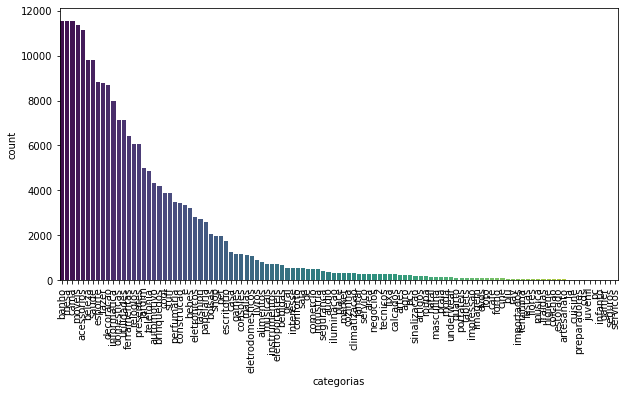

In [8]:
categoria_count_df.columns = ['categorias', 'count']
categoria_count_df = categoria_count_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='categorias', y='count', data=categoria_count_df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [9]:
print(f"Número de Produtos: {df['product_id'].nunique()}")

Número de Produtos: 32400


In [10]:
df = df[~df['price'].isnull()]
print(f"Número de produtos após a remoção dos anos nulos: {df['product_id'].nunique()}")

Número de produtos após a remoção dos anos nulos: 32400


In [11]:
x = 124.99

def round_down(preco):
    return preco - (preco%100)

round_down(x)

100.0

In [12]:
df['preco_arredondado'] = df['price'].apply(round_down)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '100.0'),
  Text(2, 0, '200.0'),
  Text(3, 0, '300.0'),
  Text(4, 0, '400.0'),
  Text(5, 0, '500.0'),
  Text(6, 0, '600.0'),
  Text(7, 0, '700.0'),
  Text(8, 0, '800.0'),
  Text(9, 0, '900.0'),
  Text(10, 0, '1000.0'),
  Text(11, 0, '1100.0'),
  Text(12, 0, '1200.0'),
  Text(13, 0, '1300.0'),
  Text(14, 0, '1400.0'),
  Text(15, 0, '1500.0'),
  Text(16, 0, '1600.0'),
  Text(17, 0, '1700.0'),
  Text(18, 0, '1800.0'),
  Text(19, 0, '1900.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2100.0'),
  Text(22, 0, '2200.0'),
  Text(23, 0, '2300.0'),
  Text(24, 0, '2400.0'),
  Text(25, 0, '2500.0'),
  Text(26, 0, '2600.0'),
  Text(27, 0, '2700.0'),
  Text(28, 0, '2800.0'),
  Text(29, 0, '2900.0'),
  Text(30, 0, '3000.0'),
  Text(31, 0, '3100.0'),
  Text(32, 0, '3

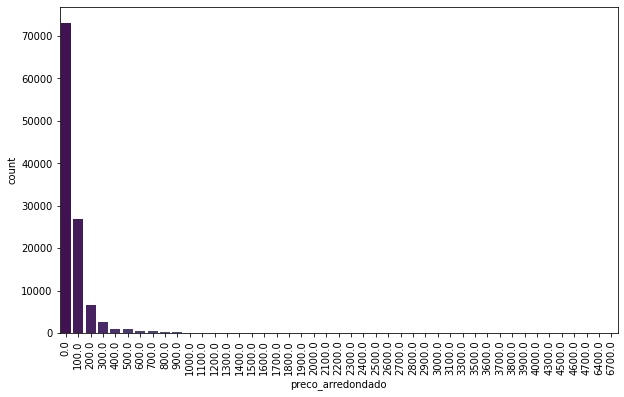

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['preco_arredondado'], palette='viridis')
plt.xticks(rotation=90)

In [14]:
categorias = list(categoria_counts.keys())

for c in categorias:
    df[c] = df['product_category_name'].transform(lambda x: int(c in x))

df[categorias].head()

,moveis,escritorio,utilidades,domesticas,casa,conforto,esporte,lazer,informatica,acessorios,...,fraldas,higiene,cine,foto,infanto,juvenil,cds,artesanato,seguros,servicos
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
categoria_preco_arredondado = pd.get_dummies(df['preco_arredondado'])
categoria_preco_arredondado.head()

,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,...,3700.0,3800.0,3900.0,4000.0,4300.0,4500.0,4600.0,4700.0,6400.0,6700.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
categoria_features = pd.concat([df[categorias], categoria_preco_arredondado], axis=1)
categoria_features

,moveis,escritorio,utilidades,domesticas,casa,conforto,esporte,lazer,informatica,acessorios,...,3700.0,3800.0,3900.0,4000.0,4300.0,4500.0,4600.0,4700.0,6400.0,6700.0
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113617,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113620,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
categoria_features_sample = categoria_features.sample(n=20000)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity


cosine_sim = cosine_similarity(categoria_features_sample, categoria_features_sample)
print(f"Dimensão da matriz cosine de similaridade: {cosine_sim.shape}")

Dimensão da matriz cosine de similaridade: (20000, 20000)


In [19]:
from fuzzywuzzy import process

def busca_categoria(produto):
    todos_produtos = df['product_id'].tolist()
    match_proximo = process.extractOne(produto, todos_produtos)
    return match_proximo[0]

/usr/local/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [20]:
produto = busca_categoria('9391a573abe00141c56e38d84d7d5b3b')
produto

'9391a573abe00141c56e38d84d7d5b3b'

In [21]:
produto_idx = dict(zip(df['product_id'].unique(), list(df.index)))
idx = produto_idx[produto]
idx

6

In [23]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_produto = [i[0] for i in sim_scores]

In [33]:
print(f"Porque você comprou {produto}:")
df['product_id'].iloc[similar_produto]

Porque você comprou 9391a573abe00141c56e38d84d7d5b3b:


139     d6fe3b4ddecd4a8393c6a1385de3bfb6
226     78efe838c04bbc568be034082200ac20
491     99a4788cb24856965c36a24e339b6058
645     99a4788cb24856965c36a24e339b6058
689     99a4788cb24856965c36a24e339b6058
721     99a4788cb24856965c36a24e339b6058
1230    368c6c730842d78016ad823897a372db
1285    53759a2ecddad2bb87a079a1f1519f73
1656    777d2e438a1b645f3aec9bd57e92672c
1948    422879e10f46682990de24d770e7f83d
Name: product_id, dtype: object

In [27]:
def get_content_based_recommendations(produto_string, n_recommendations=10):
    produto = busca_categoria(produto_string)
    idx = produto_idx[produto]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_produto = [i[0] for i in sim_scores]
    print(f"Porque você comprou {produto}:")
    print(df['product_id'].iloc[similar_produto])
    

In [28]:
get_content_based_recommendations('d6fe3b4ddecd4a8393c6a1385de3bfb6', 5) 

Porque você comprou d6fe3b4ddecd4a8393c6a1385de3bfb6:
40     a9516a079e37a9c9c36b9b78b10169e8
52     a9516a079e37a9c9c36b9b78b10169e8
113    bd07b66896d6f1494f5b86251848ced7
182    78efe838c04bbc568be034082200ac20
266    78efe838c04bbc568be034082200ac20
Name: product_id, dtype: object
